<a href="https://colab.research.google.com/github/NatBiscarra/challenge_alurastore/blob/main/Challenge ETL TelecomTelecomBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [131]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


An√°lise realizada para descobrir as m√©tricas de faturamento das quatro lojas da rede Challenge ETL Telecom Telecom.

In [87]:
lojas = [loja, loja2, loja3, loja4]                          #Lista "lojas" com as quatro vari√°veis
faturamento_total = 0                                        #Declara√ß√£o de vari√°vel para armazenar o faturamento total

#La√ßo para percorrer a lista e retornar tuplas √≠ndice e valor.
for i, l in enumerate(lojas, start=1):                       # "start=1" para iniciar na loja 1
    faturamento = sum(l.Pre√ßo)                               #Atribui √† vari√°vel "faturamento" a soma de todos os valores na coluna pre√ßo
    print(f'Faturamento da Loja {i}: R$ {faturamento:,.2f}') #Imprime o resultado no console
    faturamento_total += faturamento

#Imprime o faturamento total no console
print(f'\nFaturamento Total: R$ {faturamento_total:,.2f}')

#Atribui √†s vari√°veis "faturamento_loja" a soma dos valores da coluna pre√ßo
faturamento_loja = sum(loja.Pre√ßo)
faturamento_loja2 = sum(loja2.Pre√ßo)
faturamento_loja3 = sum(loja3.Pre√ßo)
faturamento_loja4 = sum(loja4.Pre√ßo)

Faturamento da Loja 1: R$ 1,534,509.12
Faturamento da Loja 2: R$ 1,488,459.06
Faturamento da Loja 3: R$ 1,464,025.03
Faturamento da Loja 4: R$ 1,384,497.58

Faturamento Total: R$ 5,871,490.79


Gr√°fico demonstrativo de faturamento da rede Challenge ETL Telecom Telecom.

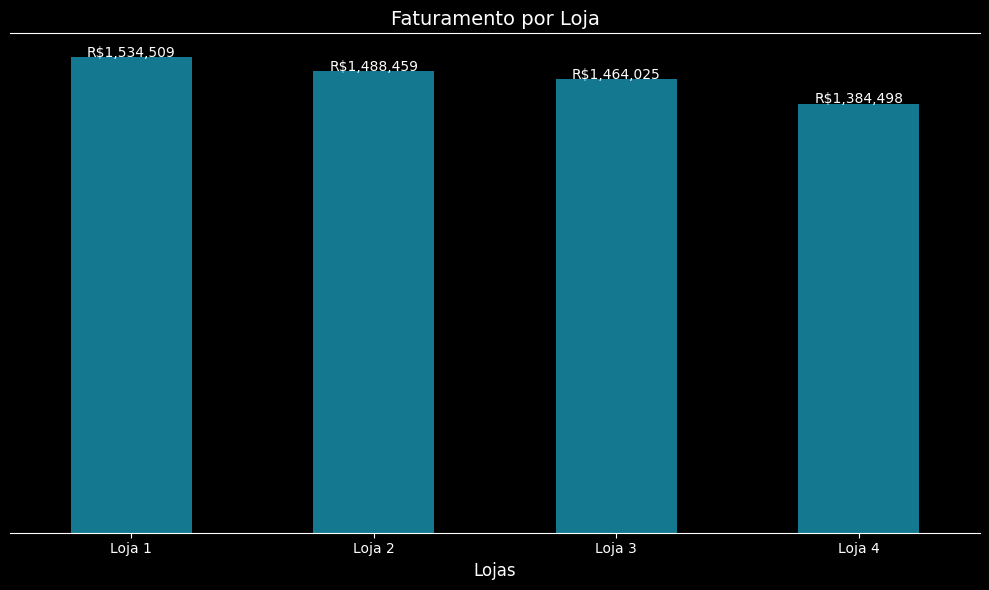

In [88]:
import matplotlib.pyplot as plt        #Importa a biblioteca matplotlib (gr√°ficos)
import pandas as pd                    #Importa a biblioteca pandas (manipula√ß√£o de dados)

#Define listas com nome e valores de faturamento das lojas
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

#Cria um dataframe com duas colunas (loja e faturamento)
df_faturamento = pd.DataFrame({'Loja': lojas_nomes, 'Faturamento': faturamentos})

#Define um gr√°fico de barra para exibir "loja" e "faturamento"
ax = df_faturamento.plot(kind='bar', x='Loja', y='Faturamento', figsize=(10, 6), legend=False, color = '#147990')

#La√ßo para adicionar os r√≥tulos de valor em cada barra
for i, valor in enumerate(df_faturamento['Faturamento']):
    ax.text(i, valor + 500, f'R${valor:,.0f}', ha='center')

#Estiliza os t√≠tulos do gr√°fico
ax.set_title('Faturamento por Loja', fontsize=14)
ax.set_xlabel('Lojas', fontsize=12)
ax.set_ylabel('Faturamento (R$)')

#R√≥tulo exibido na horizontal
ax.set_xticklabels(df_faturamento['Loja'], rotation=0)

#Desativa visualiza√ß√£o do eixo y
ax.yaxis.set_visible(False)
ax.spines[['left', 'right']].set_visible(False)

#Exibi√ß√£o do gr√°fico no console
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


An√°lise de performance para cada categoria em cada loja.

In [89]:
#Cria listas com dados e nome das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

vendas_por_categoria = [
    l.groupby('Categoria do Produto').size().rename(n) #Agrupa vendas por categoria; .size() contabiliza a qtd de vendas em cada categoria; .rename(n) renomeia os resultados com nome da loja
    for l, n in zip(lojas, nomes)] #La√ßo para percorrer duas listas ao mesmo tempo

#Concatena em um √∫nico dataframe (axis=1 cria colunas)
vendas_por_categoria = pd.concat(vendas_por_categoria, axis=1)
vendas_por_categoria.columns = nomes #Renomeia as colunas com os nomes das lojas

#Exibe no console o resultado
print(vendas_por_categoria)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


Gr√°ficos demonstrativos das vendas por categoria.

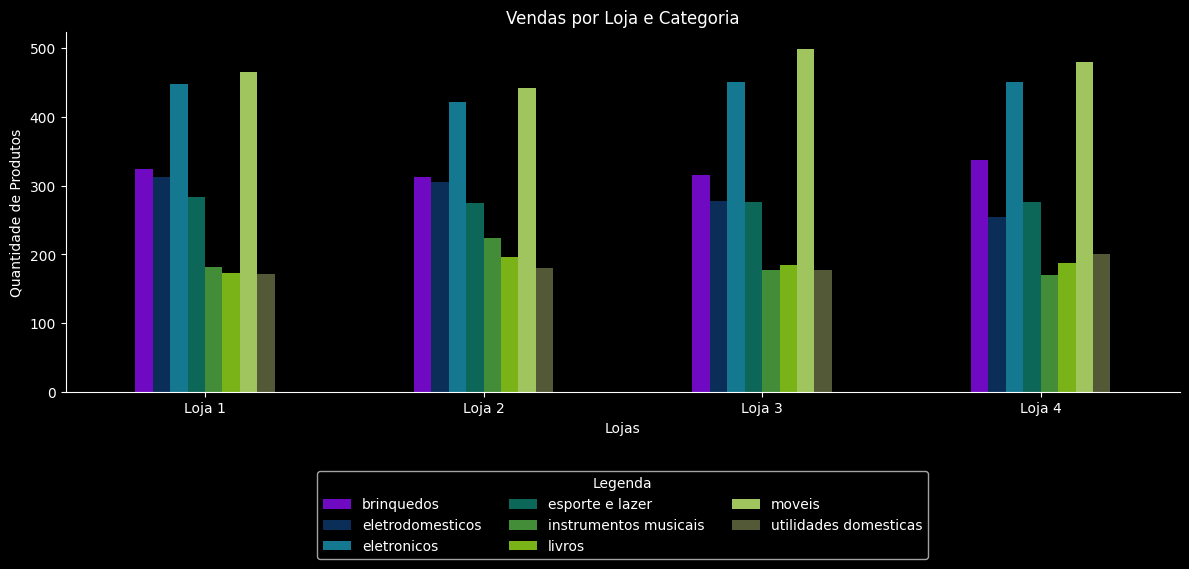

In [118]:
#Transposi√ß√£o para que a coluna "loja" vire linha
grafico_plot = vendas_por_categoria.T

cores = ['#6F0AC2', '#0B2E59', '#147990', '#0D6759', '#448D38', '#7AB317', '#A0C55F', '#535837']

#Cria√ß√£o do gr√°fico em barras
grafico_plot.plot(kind='bar', figsize=(12, 6), color=cores[:grafico_plot.shape[1]])

#T√≠tulo de r√≥tulos
plt.title('Vendas por Loja e Categoria')
plt.ylabel('Quantidade de Produtos')
plt.xlabel('Lojas')
plt.xticks(rotation=0)

#Legenda do gr√°fico
plt.legend(title='Legenda', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=10, labelcolor = 'white')

#Bordas do gr√°fico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

#Exibi√ß√£o do gr√°fico
plt.tight_layout()
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

An√°lise realizada com base nas avalia√ß√µes recebidas por cada loja.

In [91]:
lojas = [loja, loja2, loja3, loja4]

for i, l in enumerate(lojas, start=1):
    avaliacao = round(sum(l["Avalia√ß√£o da compra"]) / len(l["Avalia√ß√£o da compra"]), 2)
    print(f'Avalia√ß√£o da loja{i}:', avaliacao)

Avalia√ß√£o da loja1: 3.98
Avalia√ß√£o da loja2: 4.04
Avalia√ß√£o da loja3: 4.05
Avalia√ß√£o da loja4: 4.0


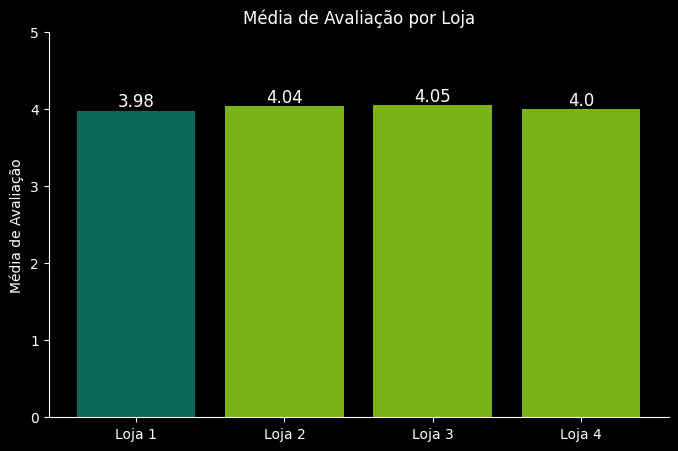

In [143]:
#Importa a biblioteca matplotlib
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.98, 4.04, 4.05, 4.0]

#Atribui uma cor diferente para a menor m√©dia
pior_media = min(medias)
cores = ['#7AB317' if media != pior_media else '#0D6759' for media in medias]

#Cria√ß√£o do gr√°fico
plt.figure(figsize=(8, 5))
plt.bar(lojas, medias, color=cores)

#T√≠tulos e r√≥tulos
plt.title('M√©dia de Avalia√ß√£o por Loja')
plt.ylabel('M√©dia de Avalia√ß√£o')
plt.ylim(0, 5)

for i, media in enumerate(medias):
    plt.text(i, media, f'{media}', ha='center', va='bottom', fontsize=12)

#Bordas do gr√°fico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.show()


# 4. Produtos Mais e Menos Vendidos

An√°lise realizada para verificar quais s√£o com maior n√∫mero de compras e os produtos menos desejados pelos clientes.

In [93]:
#Cria um dataframe com o nome dos produtos e a soma das parcelas vendidas
produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
#Ordena o dataframe de menor para maior quantidade vendida
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade", ascending=False)

#Exibe no console os 3 produtos mais e menos vendidos para cada loja
print("LOJA 1\n")
print("Produtos mais vendidos:\n")
print(produtos_loja1.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja1.tail(3).to_string(index=False))
print("-------------------------------------\n")

print("LOJA 2\n")
print("Produtos mais vendidos:\n")
print(produtos_loja2.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja2.tail(3).to_string(index=False))
print("-------------------------------------\n")

print("LOJA 3\n")
print("Produtos mais vendidos:\n")
print(produtos_loja3.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja3.tail(3).to_string(index=False))
print("-------------------------------------\n")

print("LOJA 4\n")
print("Produtos mais vendidos:\n")
print(produtos_loja4.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja4.tail(3).to_string(index=False))
print("-------------------------------------\n")

LOJA 1

Produtos mais vendidos:

           Produto  Quantidade
Secadora de roupas         214
     TV Led UHD 4K         196
            C√¥moda         188

Produtos menos vendidos:

       Produto  Quantidade
Dinossauro Rex          94
       Mochila          90
  Celular ABXY          78
-------------------------------------

LOJA 2

Produtos mais vendidos:

                 Produto  Quantidade
Iniciando em programa√ß√£o         223
        Celular Plus X42         195
                  Viol√£o         183

Produtos menos vendidos:

       Produto  Quantidade
     Bicicleta          98
 Jogo de copos          98
Mesa de jantar          89
-------------------------------------

LOJA 3

Produtos mais vendidos:

          Produto  Quantidade
        Bicicleta         191
            Fog√£o         182
Jogo de tabuleiro         181

Produtos menos vendidos:

      Produto  Quantidade
     Guitarra         100
   Smartwatch         100
TV Led UHD 4K          94
-------------------------

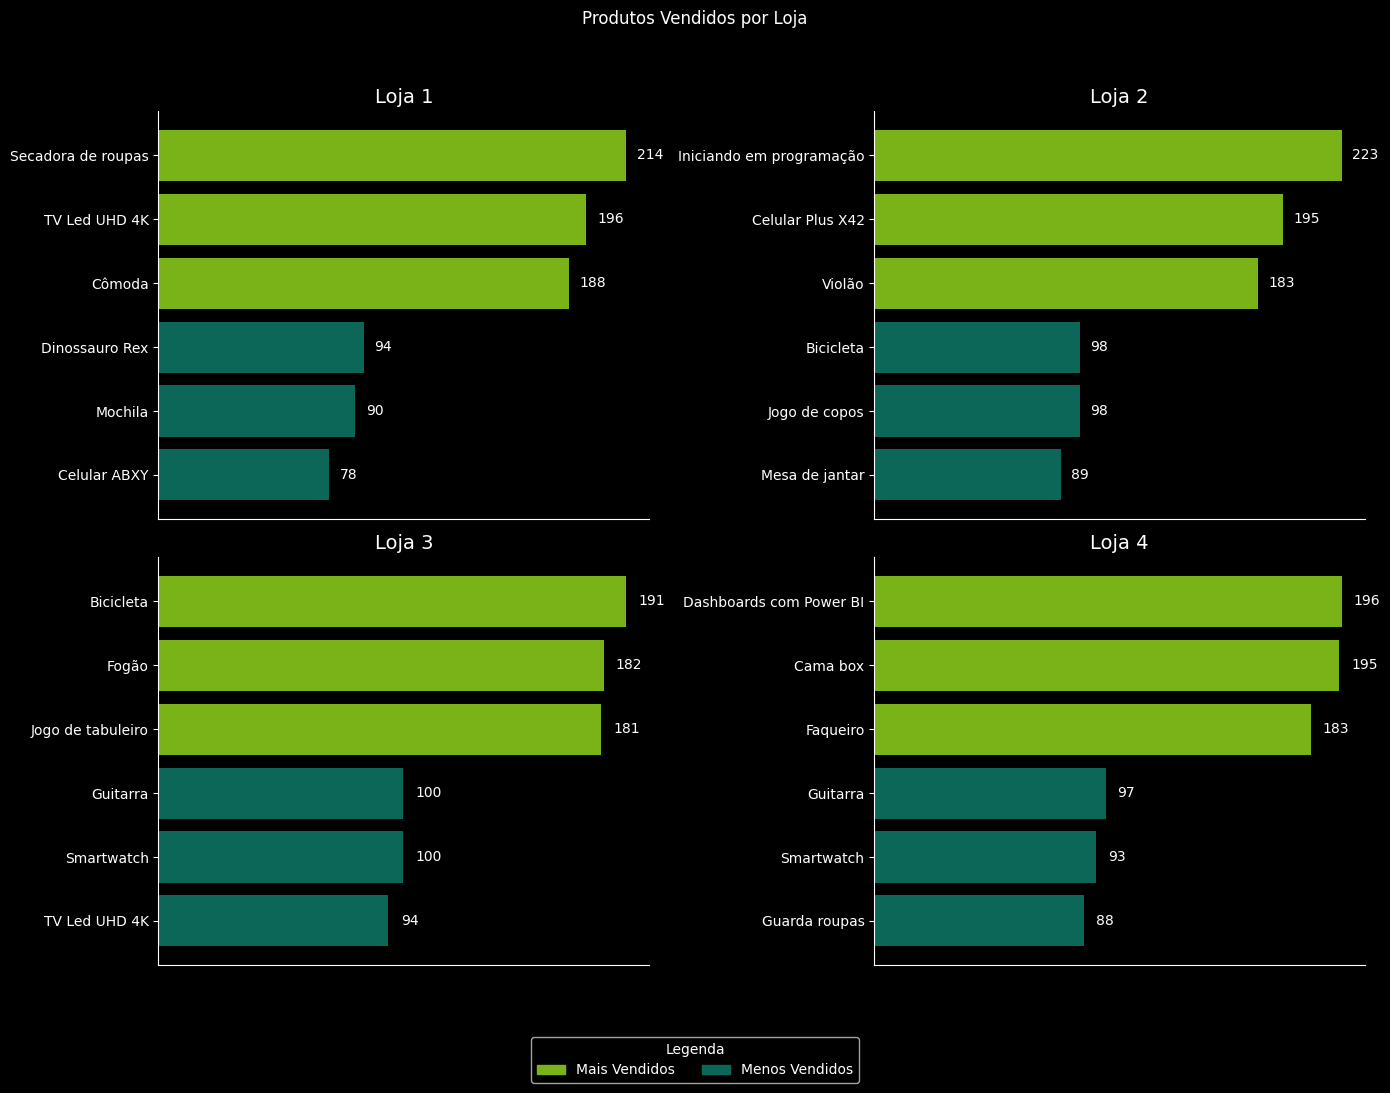

In [128]:
#Importar bibliotecas matplotlib e pandas
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

#Cria um dicion√°rio para armazenar chave-valor
produtos_por_loja = {
    'Loja 1': (produtos_loja1.head(3), produtos_loja1.tail(3)),
    'Loja 2': (produtos_loja2.head(3), produtos_loja2.tail(3)),
    'Loja 3': (produtos_loja3.head(3), produtos_loja3.tail(3)),
    'Loja 4': (produtos_loja4.head(3), produtos_loja4.tail(3))
}

#Define as cores para cada categoria
cores_top = '#7AB317'
cores_flop = '#0D6759'

#Cria uma figura com 4 subpolots (2 linhas e 2 colunas)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

#Loop que itera lista lojas
for i, loja in enumerate(lojas):
    top3, flop3 = produtos_por_loja[loja]

    #Cria um dataframe com os 6 produtos
    dados = pd.concat([top3, flop3])

    #Plota os produtos mais vendidos
    axs[i].barh(top3["Produto"], top3["Quantidade"], color=cores_top, label="Mais Vendidos")
    #Plota os produtos menos vendidos
    axs[i].barh(flop3["Produto"], flop3["Quantidade"], color=cores_flop, label="Menos Vendidos")

    #Ajusta a parte visual do gr√°fico
    axs[i].set_title(loja, fontsize=14)
    axs[i].invert_yaxis()
    axs[i].xaxis.set_visible(False)
    axs[i].grid(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(True)
    axs[i].spines['left'].set_visible(True)

    for j, v in enumerate(dados["Quantidade"]):
        axs[i].text(v + 5, j, str(v), va='center', fontsize=10)

#Cria os patches para a legenda
top_patch = mpatches.Patch(color=cores_top, label='Mais Vendidos')
flop_patch = mpatches.Patch(color=cores_flop, label='Menos Vendidos')

#Legenda √∫nica para a figura
fig.legend(handles=[top_patch, flop_patch], title='Legenda', bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=3, fontsize=10)

#Plota a figura com 4 gr√°ficos
fig.suptitle('Produtos Vendidos por Loja')
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()



# 5. Frete M√©dio por Loja


C√°lculo dos valores m√©dios de frete para cadaa loja.

In [135]:
#Cria um dicion√°rio para armazenar chave-valor
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

#Loop para criar dataframe da loja
for nome, dados in lojas.items():
    frete_medio = round(dados['Frete'].sum() / len(dados['Frete']), 2)

    print(f'O valor m√©dio de frete da {nome} √©: R$ {frete_medio}')

O valor m√©dio de frete da Loja 1 √©: R$ 34.69
O valor m√©dio de frete da Loja 2 √©: R$ 33.62
O valor m√©dio de frete da Loja 3 √©: R$ 33.07
O valor m√©dio de frete da Loja 4 √©: R$ 31.28


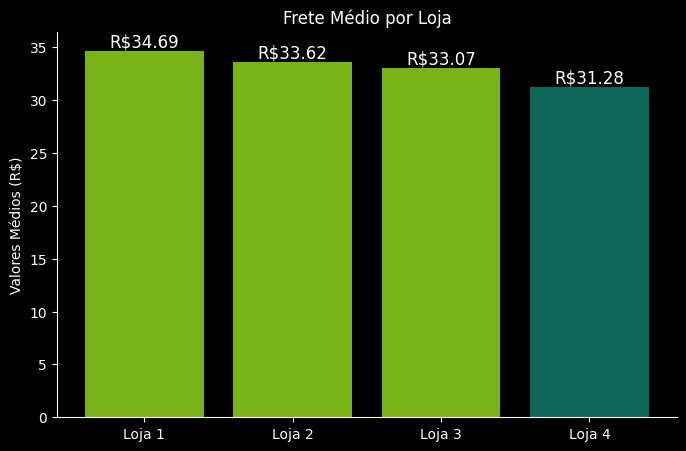

In [142]:
#Importa a biblioteca matplotlib
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [34.69, 33.62, 33.07, 31.28]

#Atribui uma cor diferente para a menor m√©dia
menor_frete = min(medias)
cores = ['#7AB317' if media != menor_frete else '#0D6759' for media in medias]

#Cria√ß√£o do gr√°fico
plt.figure(figsize=(8, 5))
plt.bar(lojas, medias, color=cores)

#T√≠tulos e r√≥tulos
plt.title('Frete M√©dio por Loja')
plt.ylabel('Valores M√©dios (R$)')

for i, media in enumerate(medias):
    plt.text(i, media, f'R${media}', ha='center', va='bottom', fontsize=12)

#Bordas do gr√°fico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.show()

# Relat√≥rio

---





## 1.   Faturamento das lojas üí∞




A partir da an√°lise realizada para as quatro lojas da rede Challenge ETL Telecom Telecom, foi poss√≠vel identificar que a `Loja 1` apresentou `maior` faturamento (`R$ 1.534.509,12`) no per√≠odo analisado.
Em contrapartida, a `Loja 4` apresentou o `menor` faturamento (`R$ 1.384.497,58`).



## 2.   Vendas por Categoria üìä




Dentre as quatro lojas Challenge ETL Telecom Telecom foi poss√≠vel identificar que h√° um padr√£o de compras, com a prefer√™ncia por itens relacionados √†s categorias de m√≥veis, eletr√¥nicos brinquedos e eletrodom√©sticos, os quais  s√£o considerados produtos que possuem maior valor agregado.
Por√©m, tamb√©m pode ser observado que na `Loja 4` h√° uma mudan√ßa de pedr√£o, em que a categoria que ocupa o 4¬∫ lugar em compras s√£o os itens de esporte e lazer, os quais conferem um menor valor agregado, portanto, menor lucro em rela√ß√£o √†s demais.

üëâ**Loja 1:**  

*   1¬∫ M√≥veis (465 itens)
*   2¬∫ Eletr√¥nicos (448 itens)
*   3¬∫ Brinquedos (324 itens)
*   4¬∫ Eletrodom√©sticos (312 itens)
*   5¬∫ Esporte e lazer (284 itens)
*   6¬∫ Instrumentos musicais (182 itens)
*   7¬∫ Livros (173 itens)
*   8¬∫ Utilidades dom√©sticas (171 itens)    

üëâ**Loja 2:**  

*   1¬∫ M√≥veis (442 itens)
*   2¬∫ Eletr√¥nicos (422 itens)
*   3¬∫ Brinquedos (313 itens)
*   4¬∫ Eletrodom√©sticos (305 itens)
*   5¬∫ Esporte e lazer (275 itens)
*   6¬∫ Instrumentos musicais (224 itens)
*   7¬∫ Livros (197 itens)
*   8¬∫ Utilidades dom√©sticas (181 itens)

üëâ**Loja 3:**  

*   1¬∫ M√≥veis (499 itens)
*   2¬∫ Eletr√¥nicos (451 itens)
*   3¬∫ Brinquedos (315 itens)
*   4¬∫ Eletrodom√©sticos (278 itens)
*   5¬∫ Esporte e lazer (277 itens)
*   6¬∫ Livros (185 itens)
*   7¬∫ Instrumentos musicais (177 itens)
*   8¬∫ Utilidades dom√©sticas (177 itens)

üëâ**Loja 4:**  

*   1¬∫ M√≥veis (480 itens)
*   2¬∫ Eletr√¥nicos (451 itens)
*   3¬∫ Brinquedos (338 itens)
*   4¬∫ Esporte e lazer (277 itens)
*   5¬∫ Eletrodom√©sticos (254 itens)
*   6¬∫ Utilidades dom√©sticas (201 itens)
*   7¬∫ Livros (187 itens)
*   8¬∫ Instrumentos musicais (170 itens)




## 3.   Avalia√ß√£o das Lojas ‚≠ê



 Os valores m√©dios de avalia√ß√£o das quatro lojas foram muito pr√≥ximos.



*  ‚¨á A `Loja 1` apresentou a **menor m√©dia de avalia√ß√£o (3,98)**, ainda que o valor seja considerado uma nota satisfat√≥ria. Esse resultado pode estar relacionado a uma log√≠stica menos eficiente ‚Äî como sugerido pelo frete m√©dio mais alto ‚Äî ou a falhas pontuais no p√≥s-venda.
*   ‚¨Ü A `Loja 3` apresentou a **maior m√©dia de avalia√ß√£o (4,05)**, o que pode indicar uma maior satisfa√ß√£o dos clientes, refletindo uma boa experi√™ncia de compra, qualidade dos produtos e efici√™ncia no atendimento e na entrega.








## 4.   Produtos Mais e Menos Vendidos üì¶



**Loja 1**

‚¨ÜProdutos mais vendidos:
*   Secadora de roupas (214 unidades)
*   TV LED UHD 4K (196 unidades)
*   C√¥moda (188 unidades)

‚¨áProdutos menos vendidos:
*   Dinossauro rex (94 unidades)
*   Mochila (90 unidades)
*   Celular ABXY (78 unidades)

**Loja 2**

‚¨ÜProdutos mais vendidos:
*   Livro Iniciando em Programa√ß√£o (223 unidades)
*   Celular Plus X42 (195 unidades)
*   Viol√£o (183 unidaade)

‚¨áProdutos menos vendidos:
*   Bicicleta (98 unidades)
*   Jogo de copos (98 unidades)
*   Mesa de jantar (89 unidades)

**Loja 3**

‚¨ÜProdutos mais vendidos:
*   Bicicleta (191 unidades)
*   Fog√£o (182 unidades)
*   Jogo de tabuleiro (181 unidades)

‚¨áProdutos menos vendidos:
*   Guitarra (100 unidades)
*   Smartwatch (100 unidades)
*   TV LED UHD 4K (94 unidades)

**Loja 4**

‚¨ÜProdutos mais vendidos:
*   Curso Dashboard Power BI (196 unidades)
*   Cama box (195 unidades)
*   Faqueiro (183 unidades)

‚¨áProdutos menos vendidos:
*   Guitarra (97 unidades)
*   Smartwatch (93 unidades)
*   Guarda-roupas (88 unidades)



## 5.   Frete M√©dio üöö




**Loja 1: R$ 34.69**


*   Maior custo total de frete e maior frete m√©dio em compara√ß√£o com as demais lojas;
*   Cen√°rio pode ser reflexo de um elevado volume de pedidos.

**Loja 2: R$ 33.62**


*   Custos totais e m√©dios de frete ligeiramente inferiores aos da Loja 1;
*   Volume de vendas similar, acompanhado de uma opera√ß√£o log√≠stica potencialmente mais otimizada.

**Loja 3: R$ 33.07**

*   Menor custo total de frete e o menor frete m√©dio dentre as lojas analisadas, indicando uma maior efici√™ncia log√≠stica;
*   Resultado pode estar relacionado a fatores como planejamento de rotas aprimorado, maior volume de itens por pedido ou localiza√ß√£o geogr√°fica mais favor√°vel.

**Loja 4: R$ 31.28**

*   Apresenta o menor custo total de frete e o menor frete m√©dio, concomitantemente com o menor volume de vendas;
*   Custos de frete reduzidos est√£o mais associados ao baixo volume de transa√ß√µes comerciais da loja do que a melhorias significativas na efici√™ncia da sua log√≠stica.



# Conclus√£o

---



*  **Loja Mais Vantajosa: Loja 1** üèÖ (Maior faturamento, bom desempenho nas categorias de alto valor, boa avalia√ß√£o m√©dia e produtos com alta receita).
*   **Loja Menos Vantajosa: Loja 4** ‚ùå (Menor faturamento, desempenho abaixo nas vendas gerais, avalia√ß√£o m√©dia razo√°vel e produtos com baixa receita).
*  **Loja a ser Vendida pelo Sr. Jo√£o: Loja 4** ‚ùå (Devido ao menor faturamento, baixo desempenho e falta de rentabilidade).